In [37]:
import ee
import wxee

ee.Initialize()

In [38]:
modis = wxee.TimeSeries("MODIS/006/MOD14A1").filterDate("2021-08-15", "2021-09-05").select("FireMask")

modis.describe()

MODIS/006/MOD14A1
	Images: 21
	Start date: 2021-08-15 00:00:00 UTC
	End date: 2021-09-04 00:00:00 UTC
	Mean interval: 1.00 days


In [39]:
fire_masks = modis.map(lambda img: img.eq(9).copyProperties(img, img.propertyNames()))

In [40]:
region = ee.Geometry.Polygon(
        [[[102.89914257995302, -1.8326004803601967],
          [102.89735059150541, -2.222643887845845],
          [103.5281816033797, -2.222643887845845],
          [103.52638961493209, -1.8326004803601972]]]
)



In [41]:
ds = fire_masks.wx.to_xarray(scale=1000, region=region, crs="EPSG:4326")


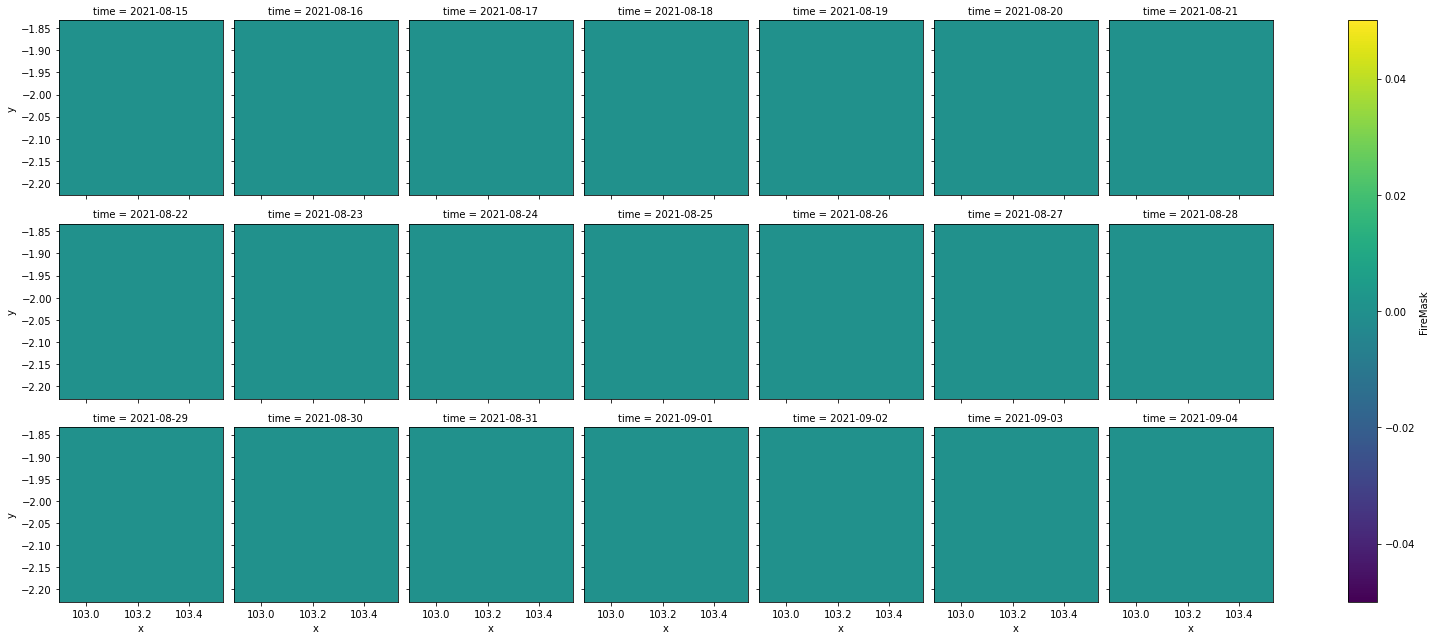

In [42]:
ds.FireMask.plot(col="time", col_wrap=7)

In [43]:
start = ds.time.min()
delta_days = (ds.time - start).dt.days

In [44]:
delta_days_fire = (ds.FireMask * delta_days).astype(int)

In [45]:
first_burned = delta_days_fire.where(delta_days_fire != 0).min("time")

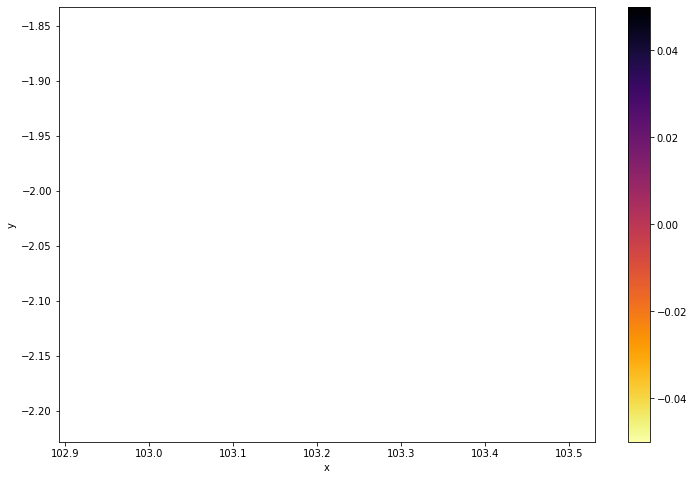

In [46]:
first_burned.plot(size=8, cmap="inferno_r")